In [1]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos
#Točke bodo formata (theta, fi)

def W(tocke):
    """Izračuna coulombsko energijo točk, upošteva, da so točke 
    v polarni obliki in imajo samo 2 koordinati,
    upošteva tudi fiksno točko na vrhu sfere.
    
    Predvideva, da so tocke array shapa (N,)"""
    energija = 0
    dolzina = len(tocke)
    tocke = tocke.reshape(dolzina//2,2)
    tocke = np.concatenate((tocke, np.array([[0.5*pi, 0]])))
    #print("Len(tocke) = ", len(tocke))
    #print("tocke.shape = ", tocke.shape)
    for i in range(tocke.shape[0]):
        for j in range(i):
            t1, f1 = tocke[i]
            t2, f2 = tocke[j]
            energija += 1/(np.sqrt(2-2*cos(t1)*cos(t2)*cos(f1-f2)-2*sin(t1)*sin(t2)))
            
    return energija
N = 3 #Koliko točk dodamo in prerazporejamo?

#Pripravimo začetne ugibe pozicij
theta0 = np.random.uniform(low =0, high = pi, size = N)
fi0 = np.random.uniform(low=0, high=2*pi, size = N)

x0 = np.array([theta0, fi0])
x0 = x0.T.reshape(-1)
#To je naš vektor začetnih ugibov v obliki (theta, fi)

Res = minimize(W, x0=x0, method= "Nelder-Mead")
W(Res.x)



3.67423461417737

## Zapakirajmo to v funkcijo, ki vrne energijo in vektor nabojev

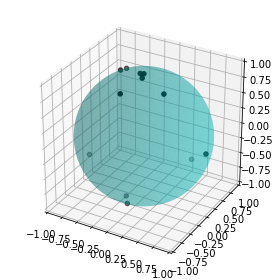

(40.68579401888042, array([[ 4.21451525e-01,  6.71478191e-01, -6.09504430e-01],
        [-1.86670620e-01, -1.92680009e-01, -9.63342355e-01],
        [ 3.65689677e-02, -1.10954122e-01,  9.93152503e-01],
        [-5.07208345e-02, -1.44794985e-02,  9.98607902e-01],
        [-4.73072804e-01,  1.56390605e-01,  8.67031776e-01],
        [-7.90901204e-03, -4.61765035e-01, -8.86967023e-01],
        [-1.02568564e-01, -4.71464966e-01,  8.75899809e-01],
        [-8.57647827e-01, -1.10230458e-01, -5.02284233e-01],
        [-4.70444326e-01,  3.19470826e-01,  8.22569466e-01],
        [ 4.26886303e-01, -1.90827810e-01,  8.83941645e-01],
        [ 1.00000000e+00,  0.00000000e+00,  6.12323400e-17],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

In [11]:
def thompson(N):
    """Razporedi naboje na enotski sferi tako, da je energija minimalna.
    N je število dodanih nabojev!!!
    Vrne energijo, array vseh sfernih kotov"""
    from scipy.optimize import minimize
    import matplotlib.pyplot as plt
    from matplotlib import cm, colors
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    pi = np.pi
    sin = np.sin
    cos = np.cos
    def karteziraj(array):
        """Dobi array shapa (N,2) in ga transformira v kartezične koordinate (x,y,z) shapa (N, 3)"""
        N = array.shape[0]
        res = np.array([])
        for item in array:
            t,f = item
            x = sin(t)*cos(f)
            y = sin(t)*sin(f)
            z = cos(t)
            res = np.concatenate((res, np.array([x,y,z])))
        res = np.concatenate((res, np.array([0,0,1])))
        return res.reshape(N+1,3)

    
    def W(tocke):
        """Izračuna coulombsko energijo točk, upošteva, da so točke 
        v polarni obliki in imajo samo 2 koordinati,
        upošteva tudi fiksno točko na vrhu sfere.

        Predvideva, da so tocke array shapa (N,)"""
        energija = 0
        dolzina = len(tocke)
        tocke = tocke.reshape(dolzina//2,2)
        tocke = np.concatenate((tocke, np.array([[0.5*pi, 0]])))
        #print("Len(tocke) = ", len(tocke))
        #print("tocke.shape = ", tocke.shape)
        for i in range(tocke.shape[0]):
            for j in range(i):
                t1, f1 = tocke[i]
                t2, f2 = tocke[j]
                energija += 1/(np.sqrt(2-2*cos(t1)*cos(t2)*cos(f1-f2)-2*sin(t1)*sin(t2)))

        return energija
    N=N
    #Pripravimo začetne ugibe pozicij
    theta0 = np.random.uniform(low = 0, high = pi, size = N)
    fi0 = np.random.uniform(low=0, high=2*pi, size = N)

    x0 = np.array([theta0, fi0])
    x0 = x0.T.reshape(-1)
    #To je naš vektor začetnih ugibov v obliki (theta, fi)
    Res = minimize(W, x0=x0, method= "Nelder-Mead")
    tocke = Res.x.reshape(N,2)
    tocke = np.concatenate((tocke, np.array([[0.5*pi, 0]])))
    tocke = karteziraj(tocke)
    
    xx = tocke[:,0]
    yy = tocke[:,1]
    zz = tocke[:,2]



    # Create a sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)

    #Set colours and render
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    ax.scatter(xx,yy,zz,color="k",s=20)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()

    return W(Res.x), tocke
    
thompson(10)

In [3]:
def karteziraj(array):
    """Dobi array shapa (N,2) in ga transformira v kartezične koordinate (x,y,z) shapa (N, 3)"""
    N = array.shape[0]
    res = np.array([])
    for item in array:
        t,f = item
        x = sin(t)*cos(f)
        y = sin(t)*sin(f)
        z = cos(t)
        res = np.concatenate((res, np.array([x,y,z])))
    res = np.concatenate((res, np.array([0,0,1])))
    return res.reshape(N+1,3)

In [4]:
karteziraj(Res.x.reshape(Res.x.shape[0]//2,2))

array([[ 0.24429684,  0.22678214, -0.94280906],
       [ 0.07425055, -0.32495607, -0.94280985],
       [ 0.31855036, -0.09817661,  0.94280805],
       [ 0.        ,  0.        ,  1.        ]])

In [5]:
a = np.array([[ 0.24429684,  0.22678214, -0.94280906],
       [ 0.07425055, -0.32495607, -0.94280985],
       [ 0.31855036, -0.09817661,  0.94280805],
       [ 0.        ,  0.        ,  1.        ]])
a[:,0]

array([0.24429684, 0.07425055, 0.31855036, 0.        ])